# EM method
Models with a latent variable are quite common in data mining and statistics. One of the most popular examples is soft clustering using a mixture of gaussians. It can be used to divide data into clusters, and assign each point a probability of belonging to each cluster (as opposed to hard clustering methods like k-means, which only assigns a cluster number to each point). It also can be a way to model more complex probability density functions.  Probabilistically, the model is as follows:
$$ p_{\theta}(x) = \int{p_{\theta}(x|z) p(z) dz} = \sum_{i=1}^K p_{\theta}(x|z) p(z) $$, 
where K is set in advance as a hyperparameter, $x \in \mathbb{R}^d$, $\theta = \mu_1, \dots \mu_K$, $z \in \{1,\dots, K\}$ is a categorical, latent variable and $p_{\theta}(x|z) \sim \mathcal{N}(\mu_z, \Sigma).$

In [207]:
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("fivethirtyeight")

from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

np.random.seed(42)  # do not change

In [208]:
load_iris().keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [209]:
iris = load_iris()
x = iris["data"]
y = iris["target"]

In [210]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

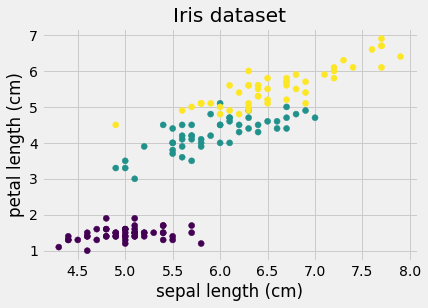

In [211]:
plt.scatter(x[:, 0], x[:, 2], c=y)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Iris dataset");

In [212]:
gm = GaussianMixture(n_components=3, tol=1e-4)

In [213]:
y_pred = gm.fit_predict(x[:, [0, 2]])
probas = gm.predict_proba(x[:, [0, 2]])
gm.converged_

True

0
1
2


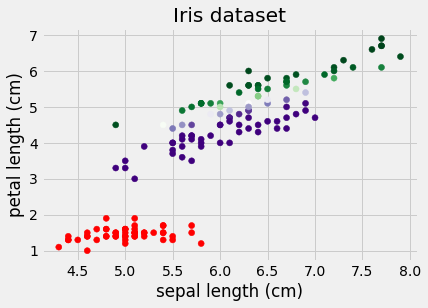

In [214]:
names = ["Oranges", "Purples", "Greens"]
cmaps = [plt.get_cmap(name) for name in names]

def standarize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

for i in range(3):

    subset = x[y_pred == i]
    probas_subset = np.array([round(y, 4) for y in probas[y_pred==i][:, i]])
    if i == 0:
        plt.scatter(subset[:, 0], subset[:, 2], c=["red" for _ in probas_subset])
    else:
        plt.scatter(subset[:, 0], subset[:, 2], c=probas_subset, cmap=cmaps[i])
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Iris dataset");
plt.savefig("img/iris_gaussian_mixture.eps", format="eps", bbox_inches="tight")

In [205]:
(y_pred == y).mean()  # warning: y_pred could have classes permuted randomly

0.9133333333333333